In [1]:
# version 1.1

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset/diabetes.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
DF_Dieabets = pd.read_csv("/kaggle/input/dataset/diabetes.csv")
DF_Dieabets.shape

(768, 9)

In [4]:
DF_Dieabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
DF_Dieabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
DF_Dieabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
DF_Dieabets.loc[DF_Dieabets.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
DF_Dieabets.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
Columns = DF_Dieabets.columns
Columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
for Col in Columns:
    Uniques = DF_Dieabets[Col].unique()
    print("Uniques Data Of {} is : ".format(Col))
    print(np.sort(Uniques))
    print("Minimum Is : {} And Maximum Is : {} ".format(Uniques.min(),Uniques.max()))
    print()

Uniques Data Of Pregnancies is : 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Minimum Is : 0 And Maximum Is : 17 

Uniques Data Of Glucose is : 
[  0  44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188
 189 190 191 193 194 195 196 197 198 199]
Minimum Is : 0 And Maximum Is : 199 

Uniques Data Of BloodPressure is : 
[  0  24  30  38  40  44  46  48  50  52  54  55  56  58  60  61  62  64
  65  66  68  70  72  74  75  76  78  80  82  84  85  86  88  90  92  94
  95  96  98 100 102 104 106 108 110 114 122]
Minimum Is : 0 And Maximum 

In [11]:
fig = px.box(DF_Dieabets)
fig.update_xaxes()
fig.show()

# **Replacing Outliers With Zero**

In [12]:
for Col in Columns:
    UperBound = DF_Dieabets[Col].mean()+(3*DF_Dieabets[Col].std())
    LowerBound = DF_Dieabets[Col].mean()-(3*DF_Dieabets[Col].std())
    DF_Dieabets[Col][(DF_Dieabets[Col]<LowerBound) | (DF_Dieabets[Col]>UperBound)] = 0


# **Replacing Zeroes with Mean**

In [13]:
Col_Editable = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for Col in Col_Editable:
    if DF_Dieabets[Col].dtype == np.int64:
        DF_Dieabets[Col][DF_Dieabets[Col]==0] = round(DF_Dieabets[Col].mean())
    elif DF_Dieabets[Col].dtype == np.float64:
        DF_Dieabets[Col][DF_Dieabets[Col]==0] = round(DF_Dieabets[Col].mean(),3)


In [14]:
DF_Dieabets["Insulin"][DF_Dieabets["Insulin"]==0] = np.NAN
DF_Dieabets["SkinThickness"][DF_Dieabets["SkinThickness"]==0] = np.NAN
SkinThickness = DF_Dieabets["SkinThickness"][DF_Dieabets["SkinThickness"]>0]
Insulin = DF_Dieabets["Insulin"][DF_Dieabets["Insulin"]>0]

In [15]:
NV_SkinThickness = DF_Dieabets['SkinThickness'][DF_Dieabets['SkinThickness'].isna()].index
NV_Insulin = DF_Dieabets['Insulin'][DF_Dieabets['Insulin'].isna()].index
for NV in NV_SkinThickness:
    DF_Dieabets.loc[NV,"SkinThickness"] = np.random.randint(SkinThickness.min(),SkinThickness.max())
for NV in NV_Insulin:
    DF_Dieabets.loc[NV,"Insulin"] = np.random.randint(Insulin.min(),Insulin.max())
DF_Dieabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.766927,121.682292,72.250000,30.761719,169.197917,32.332086,0.450824,32.985677,0.348958
std,3.281508,30.435999,12.117203,12.272620,103.572118,6.629125,0.279561,11.322972,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,83.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,149.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,39.000000,244.250000,36.500000,0.602000,40.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,415.000000,55.000000,1.461000,68.000000,1.000000


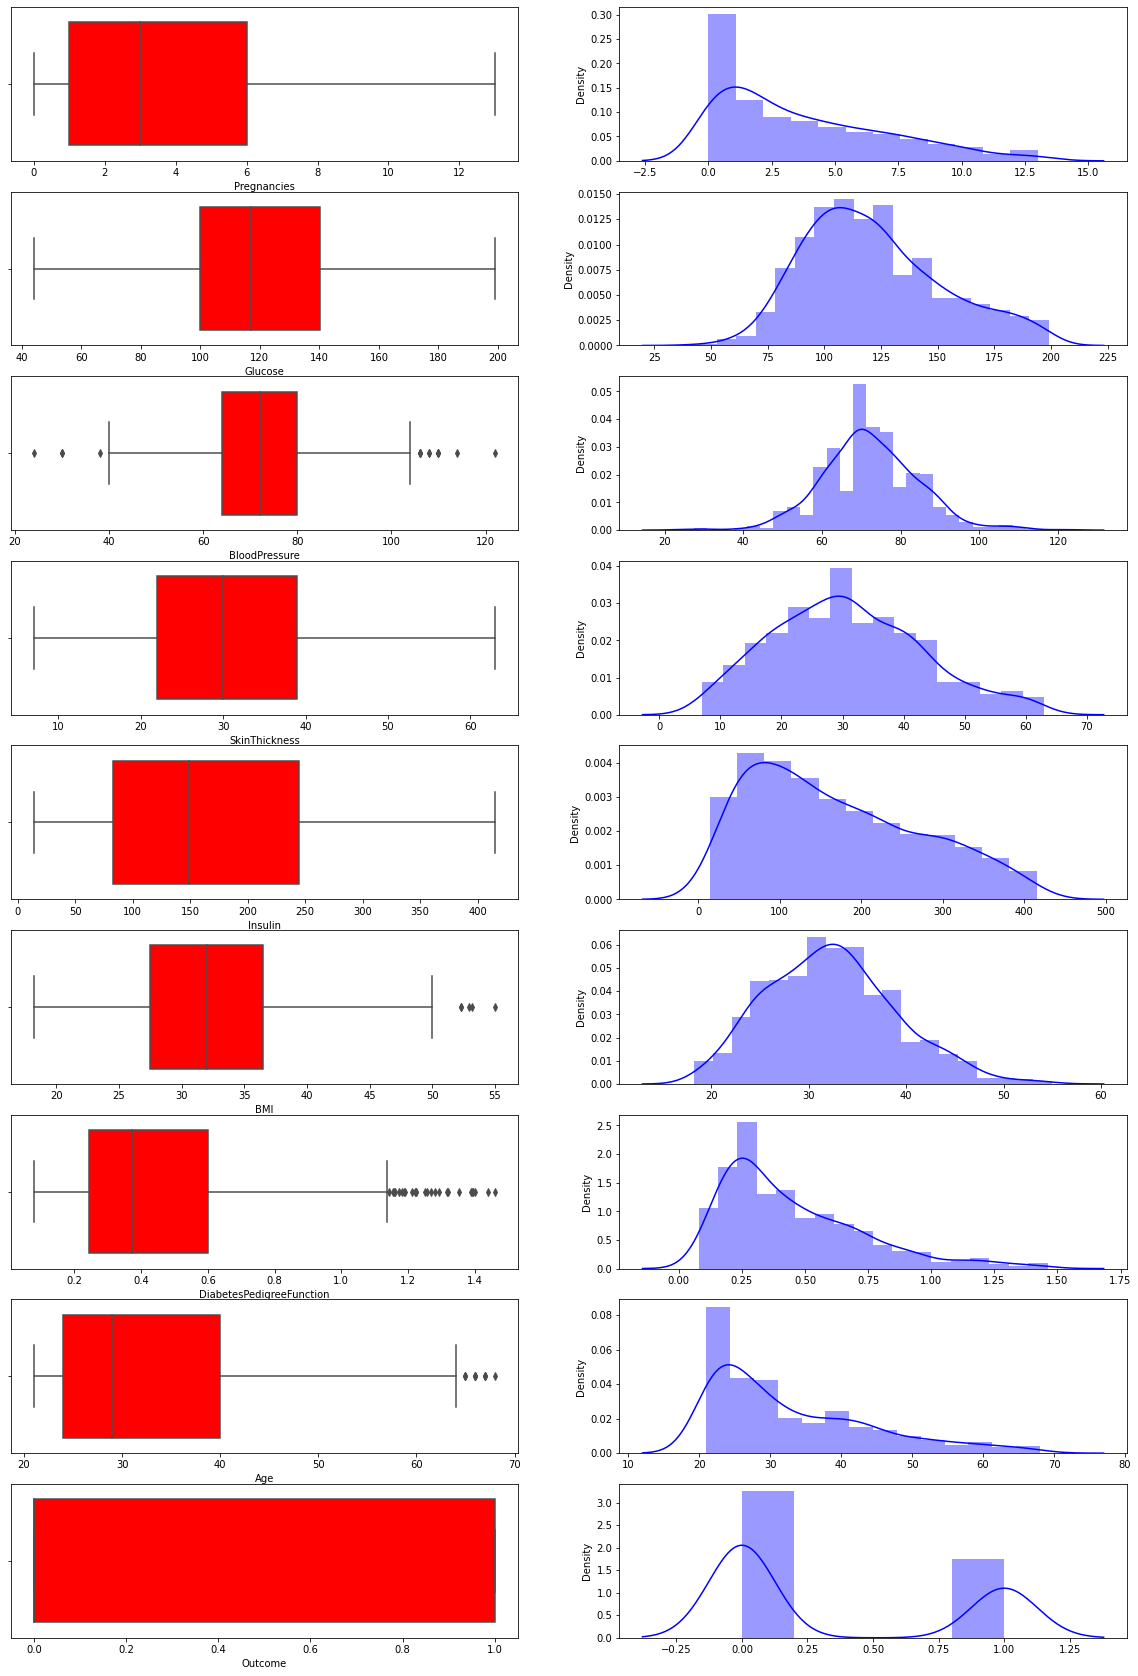

In [16]:
Lable_Columns = DF_Dieabets.columns
fig, axes = plt.subplots(len(Lable_Columns),2, figsize=(20, 30))
for i,L in enumerate(Lable_Columns):
    sns.boxplot(x=DF_Dieabets[L],data=DF_Dieabets,color='r',saturation=1,ax=axes[i,0])
    sns.distplot(x=DF_Dieabets[L],color='b',ax=axes[i,1])

<AxesSubplot:>

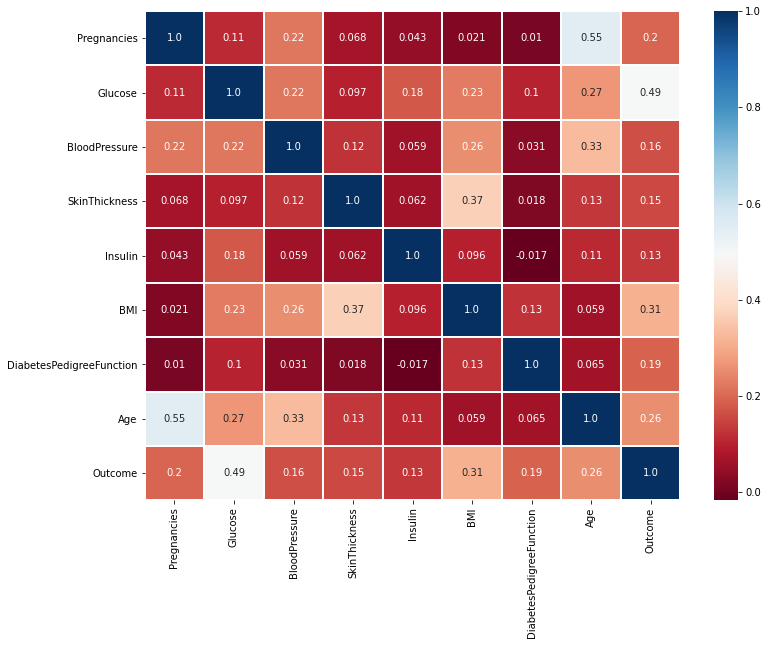

In [17]:
plt.figure(figsize=(12,9),)
sns.heatmap(DF_Dieabets.corr(),annot=True,fmt='0.2',linewidths=0.1,cmap="RdBu")

<AxesSubplot:xlabel='Outcome', ylabel='count'>

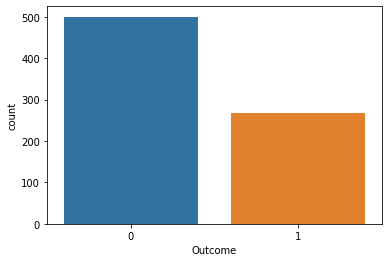

In [18]:
sns.countplot(DF_Dieabets["Outcome"])

In [19]:
X_DF_Dieabets = DF_Dieabets.drop("Outcome", axis=1)
Y_DF_Dieabets = DF_Dieabets["Outcome"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_DF_Dieabets,Y_DF_Dieabets, test_size=0.3, train_size=0.7, random_state=77, shuffle=(True), stratify=(Y_DF_Dieabets))

In [20]:
from sklearn.utils import class_weight
Class_weights = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)
Class_weights = dict(zip(np.unique(Y_train), class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train))) 
Class_weights

{0: 0.7671428571428571, 1: 1.4358288770053476}

In [21]:
Features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# **KNN Algorithm**

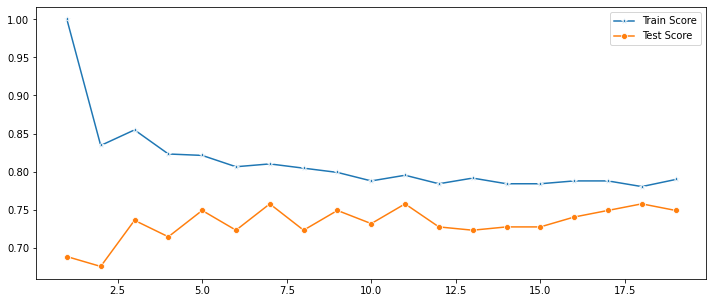

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

K_Range = list(range(1,20))
Train_Scores = []
Test_Scores = []

for K in K_Range:
    KNN = KNeighborsClassifier(n_neighbors=K , metric='minkowski', p=1) #Defult p is 1 means euclidian 2 is Manhatan Distance
    KNN.fit(X_train,Y_train)
    Predicted_Types_KNN = KNN.predict(X_test)
    Train_Scores.append(KNN.score(X_train,Y_train))
    Test_Scores.append(KNN.score(X_test,Y_test))

plt.figure(figsize=(12,5))
p = sns.lineplot(K_Range,Train_Scores,marker='*',label='Train Score')
p = sns.lineplot(K_Range,Test_Scores,marker='o',label='Test Score')

# **Decision Tree Algorithm**

In [23]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
Predicted_Types_DT = DT.predict(X_test)
print("Train Score : ",DT.score(X_train,Y_train))
print("Test  Score : ",DT.score(X_test,Y_test))

Train Score :  1.0
Test  Score :  0.670995670995671


# **Nave Beyes Classifier**

In [24]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train,Y_train)
Predicted_Types_GNB = GNB.predict(X_test)
print("Train Score : ",GNB.score(X_train,Y_train))
print("Test  Score : ",GNB.score(X_test,Y_test))

Train Score :  0.7579143389199255
Test  Score :  0.7575757575757576


# **Logistic Regression Algorithm**

In [25]:
from sklearn.linear_model import LogisticRegression

# LR = LogisticRegression(class_weight=Class_weights)
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Predicted_Types_LR = LR.predict(X_test)
print("Train Score : ",LR.score(X_train,Y_train))
print("Test  Score : ",LR.score(X_test,Y_test))

Train Score :  0.7746741154562383
Test  Score :  0.7575757575757576


# **Random Forest Algorithm**

In [26]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50)
RFC.fit(X_train,Y_train)
Predicted_Types_RFC = RFC.predict(X_test)
print("Train Score : ",RFC.score(X_train,Y_train))
print("Test  Score : ",RFC.score(X_test,Y_test))

Train Score :  1.0
Test  Score :  0.7489177489177489


# **SVM Algorithm**

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

SVM =SVC(class_weight=Class_weights)

# param = [{"kernel" : ["linear"] ,"C" : [0.01 , 0.1, 1, 10, 100]}]
param = [{"kernel" : ["linear"] ,"C" : [0.01 , 0.1, 1, 10, 100]},
         {"kernel" : ["rbf"], "gamma" : [0.01, 0.1, 0.2, 0.3], "C":  [0.01 , 0.1, 1, 10, 100]},
         {"kernel" : ["poly"], "degree": [2], "C": [0.01, 0.1, 1, 10, 100]}]

GS = GridSearchCV(SVM, param, cv=5, scoring="accuracy")
GS.fit(X_DF_Dieabets,Y_DF_Dieabets)
print(GS.best_score_)
print(GS.best_params_)

0.7539767422120363
{'C': 10, 'degree': 2, 'kernel': 'poly'}


# **Cross Validation**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Predicted_Types_LR = LR.predict(X_test)
print("Train Score : ",LR.score(X_train,Y_train))
print("Test  Score : ",LR.score(X_test,Y_test))

Train Score :  0.7746741154562383
Test  Score :  0.7575757575757576


In [29]:
from sklearn.model_selection import cross_val_predict,cross_val_score

Score_DT = cross_val_score(DT,X_DF_Dieabets,Y_DF_Dieabets,cv=10)
print(Score_DT)
Score_KNN = cross_val_score(KNN,X_DF_Dieabets,Y_DF_Dieabets,cv=10)
print(Score_KNN)

[0.58441558 0.72727273 0.63636364 0.5974026  0.71428571 0.71428571
 0.68831169 0.76623377 0.71052632 0.64473684]
[0.80519481 0.77922078 0.71428571 0.63636364 0.63636364 0.76623377
 0.72727273 0.79220779 0.78947368 0.73684211]
